In [1]:
import boto3
import botocore
from iterdub import iterdub as ib
import matplotlib.pyplot as plt
import pandas as pd
from pandas.util import hash_pandas_object
from scipy import stats
import seaborn as sns
from teeplot import teeplot as tp

# get data

In [2]:
s3_handle = boto3.resource(
    's3',
    region_name="us-east-2",
    config=botocore.config.Config(
        signature_version=botocore.UNSIGNED,
    ),
)
bucket_handle = s3_handle.Bucket('prq49')

series_profiles, = bucket_handle.objects.filter(
    Prefix=f'endeavor=16/stage=8+what=elaborated/',
)

In [3]:
df = pd.read_csv(
    f's3://prq49/{series_profiles.key}',
    compression='xz',
)
dfdigest = '{:x}'.format( hash_pandas_object( df ).sum() )
dfdigest

'581a93929506b064'

In [4]:
for stint in df['Stint'].unique():
    exec(f'df{stint} = df[ df["Stint"] == {stint} ]')

# how does resource sharing change over time?

teeplots/bucket=prq49+endeavor=16+hue=series+transform=identity+viz=lineplot+x=stint+y=mean-resource-received-per-cell+_dfdigest=581a93929506b064+ext=.pdf
teeplots/bucket=prq49+endeavor=16+hue=series+transform=identity+viz=lineplot+x=stint+y=mean-resource-received-per-cell+_dfdigest=581a93929506b064+ext=.png


<AxesSubplot:xlabel='Stint', ylabel='Mean Resource Received Per Cell'>

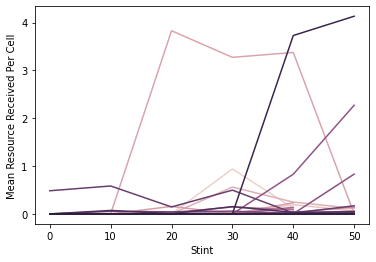

In [5]:
tp.tee(
    sns.lineplot,
    data=df,
    x='Stint',
    y='Mean Resource Received Per Cell',
    hue='Series',
    legend=False,
    teeplot_outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',    
        '_dfdigest' : dfdigest,
    },
)

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 75.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 70.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 62.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 51.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 55.9% of the points cannot be placed; y

teeplots/bucket=prq49+endeavor=16+transform=identity+viz=swarmplot-boxplot+x=stint+y=mean-resource-received-per-cell+_dfdigest=581a93929506b064+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=identity+viz=swarmplot-boxplot+x=stint+y=mean-resource-received-per-cell+_dfdigest=581a93929506b064+ext=.png


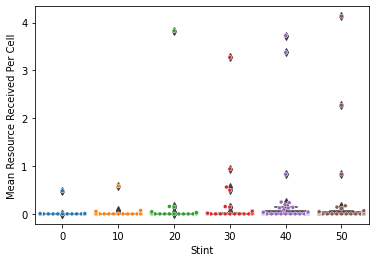

In [6]:
def swarmplot_boxplot(*args, **kwargs):
    sns.swarmplot(
        *args,
        **kwargs,
        edgecolor='w',
        linewidth=0.5,
        s=4,
    )
    sns.boxplot(
        *args,
        **kwargs,
    )

tp.tee(
    swarmplot_boxplot,
    data=df,
    x='Stint',
    y='Mean Resource Received Per Cell',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',
        '_dfdigest' : dfdigest,
    },
)

teeplots/bucket=prq49+endeavor=16+hue=series+transform=identity+viz=lineplot+x=stint+y=resource-receiving-cell-fraction+_dfdigest=581a93929506b064+ext=.pdf
teeplots/bucket=prq49+endeavor=16+hue=series+transform=identity+viz=lineplot+x=stint+y=resource-receiving-cell-fraction+_dfdigest=581a93929506b064+ext=.png


<AxesSubplot:xlabel='Stint', ylabel='Resource Receiving Cell Fraction'>

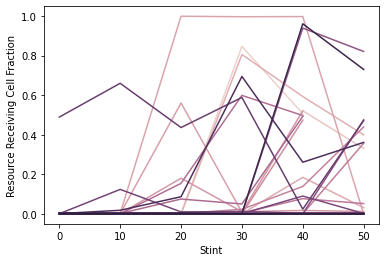

In [7]:
tp.tee(
    sns.lineplot,
    data=df,
    x='Stint',
    y='Resource Receiving Cell Fraction',
    hue='Series',
    legend=False,
    teeplot_outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',    
        '_dfdigest' : dfdigest,
    },
)

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 75.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 72.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 60.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 57.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 35.9% of the points cannot be placed; y

teeplots/bucket=prq49+endeavor=16+transform=identity+viz=swarmplot-boxplot+x=stint+y=resource-receiving-cell-fraction+_dfdigest=581a93929506b064+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=identity+viz=swarmplot-boxplot+x=stint+y=resource-receiving-cell-fraction+_dfdigest=581a93929506b064+ext=.png


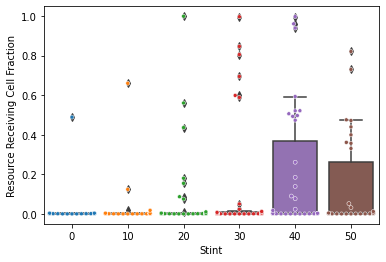

In [8]:
def swarmplot_boxplot(*args, **kwargs):
    sns.swarmplot(
        *args,
        **kwargs,
        edgecolor='w',
        linewidth=0.5,
        s=4,
    )
    sns.boxplot(
        *args,
        **kwargs,
    )

tp.tee(
    swarmplot_boxplot,
    data=df,
    x='Stint',
    y='Resource Receiving Cell Fraction',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',
        '_dfdigest' : dfdigest,
    },
)

# how does apoptosis change over time?

teeplots/bucket=prq49+endeavor=16+hue=series+transform=identity+viz=lineplot+x=stint+y=fraction-deaths-apoptosis+_dfdigest=581a93929506b064+ext=.pdf
teeplots/bucket=prq49+endeavor=16+hue=series+transform=identity+viz=lineplot+x=stint+y=fraction-deaths-apoptosis+_dfdigest=581a93929506b064+ext=.png


<AxesSubplot:xlabel='Stint', ylabel='Fraction Deaths apoptosis'>

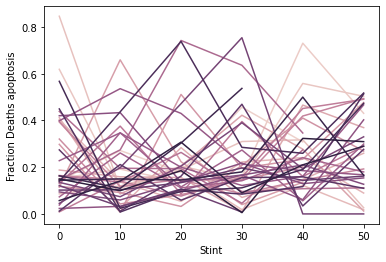

In [9]:
tp.tee(
    sns.lineplot,
    data=df,
    x='Stint',
    y='Fraction Deaths apoptosis',
    hue='Series',
    legend=False,
    teeplot_outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',    
        '_dfdigest' : dfdigest,
    },
)

teeplots/bucket=prq49+endeavor=16+transform=identity+viz=swarmplot-boxplot+x=stint+y=fraction-deaths-apoptosis+_dfdigest=581a93929506b064+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=identity+viz=swarmplot-boxplot+x=stint+y=fraction-deaths-apoptosis+_dfdigest=581a93929506b064+ext=.png


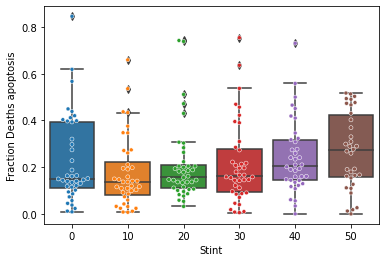

In [10]:
def swarmplot_boxplot(*args, **kwargs):
    sns.swarmplot(
        *args,
        **kwargs,
        edgecolor='w',
        linewidth=0.5,
        s=4,
    )
    sns.boxplot(
        *args,
        **kwargs,
    )

tp.tee(
    swarmplot_boxplot,
    data=df,
    x='Stint',
    y='Fraction Deaths apoptosis',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',
        '_dfdigest' : dfdigest,
    },
)

# how does elimination change over time?

teeplots/bucket=prq49+endeavor=16+hue=series+transform=identity+viz=lineplot+x=stint+y=fraction-deaths-elimination+_dfdigest=581a93929506b064+ext=.pdf
teeplots/bucket=prq49+endeavor=16+hue=series+transform=identity+viz=lineplot+x=stint+y=fraction-deaths-elimination+_dfdigest=581a93929506b064+ext=.png


<AxesSubplot:xlabel='Stint', ylabel='Fraction Deaths elimination'>

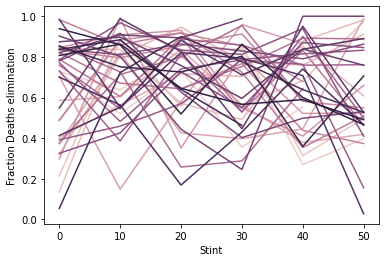

In [11]:
tp.tee(
    sns.lineplot,
    data=df,
    x='Stint',
    y='Fraction Deaths elimination',
    hue='Series',
    legend=False,
    teeplot_outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',    
        '_dfdigest' : dfdigest,
    },
)

teeplots/bucket=prq49+endeavor=16+transform=identity+viz=swarmplot-boxplot+x=stint+y=fraction-deaths-elimination+_dfdigest=581a93929506b064+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=identity+viz=swarmplot-boxplot+x=stint+y=fraction-deaths-elimination+_dfdigest=581a93929506b064+ext=.png


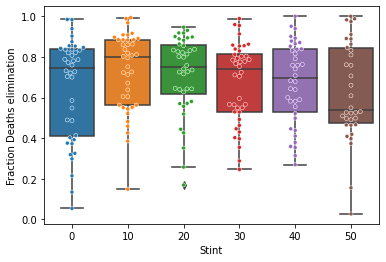

In [12]:
def swarmplot_boxplot(*args, **kwargs):
    sns.swarmplot(
        *args,
        **kwargs,
        edgecolor='w',
        linewidth=0.5,
        s=4,
    )
    sns.boxplot(
        *args,
        **kwargs,
    )

tp.tee(
    swarmplot_boxplot,
    data=df,
    x='Stint',
    y='Fraction Deaths elimination',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',
        '_dfdigest' : dfdigest,
    },
)

# how does nulliparous fraction change over time?

teeplots/bucket=prq49+endeavor=16+hue=series+transform=identity+viz=lineplot+x=stint+y=nulliparous-fraction+_dfdigest=581a93929506b064+ext=.pdf
teeplots/bucket=prq49+endeavor=16+hue=series+transform=identity+viz=lineplot+x=stint+y=nulliparous-fraction+_dfdigest=581a93929506b064+ext=.png


<AxesSubplot:xlabel='Stint', ylabel='Nulliparous Fraction'>

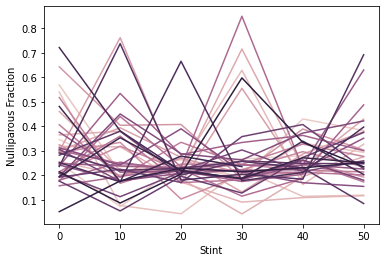

In [13]:
tp.tee(
    sns.lineplot,
    data=df,
    x='Stint',
    y='Nulliparous Fraction',
    hue='Series',
    legend=False,
    teeplot_outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',    
        '_dfdigest' : dfdigest,
    },
)

teeplots/bucket=prq49+endeavor=16+transform=identity+viz=swarmplot-boxplot+x=stint+y=nulliparous-fraction+_dfdigest=581a93929506b064+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=identity+viz=swarmplot-boxplot+x=stint+y=nulliparous-fraction+_dfdigest=581a93929506b064+ext=.png


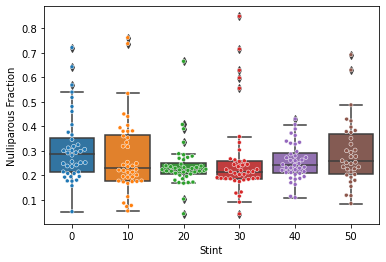

In [14]:
def swarmplot_boxplot(*args, **kwargs):
    sns.swarmplot(
        *args,
        **kwargs,
        edgecolor='w',
        linewidth=0.5,
        s=4,
    )
    sns.boxplot(
        *args,
        **kwargs,
    )

tp.tee(
    swarmplot_boxplot,
    data=df,
    x='Stint',
    y='Nulliparous Fraction',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',
        '_dfdigest' : dfdigest,
    },
)

# how does inner kin group size change over time?

teeplots/bucket=prq49+endeavor=16+hue=series+transform=identity+viz=lineplot+x=stint+y=mean-kin-group-size-level-0+_dfdigest=581a93929506b064+ext=.pdf
teeplots/bucket=prq49+endeavor=16+hue=series+transform=identity+viz=lineplot+x=stint+y=mean-kin-group-size-level-0+_dfdigest=581a93929506b064+ext=.png


<AxesSubplot:xlabel='Stint', ylabel='Mean Kin Group Size Level 0'>

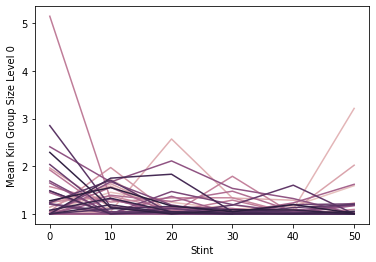

In [15]:
tp.tee(
    sns.lineplot,
    data=df,
    x='Stint',
    y='Mean Kin Group Size Level 0',
    hue='Series',
    legend=False,
    teeplot_outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',    
        '_dfdigest' : dfdigest,
    },
)

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 27.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 17.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 32.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 37.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 51.3% of the points cannot be placed; y

teeplots/bucket=prq49+endeavor=16+transform=identity+viz=swarmplot-boxplot+x=stint+y=mean-kin-group-size-level-0+_dfdigest=581a93929506b064+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=identity+viz=swarmplot-boxplot+x=stint+y=mean-kin-group-size-level-0+_dfdigest=581a93929506b064+ext=.png


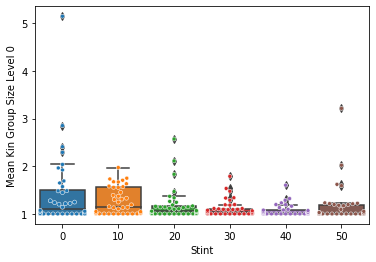

In [16]:
def swarmplot_boxplot(*args, **kwargs):
    sns.swarmplot(
        *args,
        **kwargs,
        edgecolor='w',
        linewidth=0.5,
        s=4,
    )
    sns.boxplot(
        *args,
        **kwargs,
    )

tp.tee(
    swarmplot_boxplot,
    data=df,
    x='Stint',
    y='Mean Kin Group Size Level 0',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',
        '_dfdigest' : dfdigest,
    },
)

# how does outer kin group size change over time?

teeplots/bucket=prq49+endeavor=16+hue=series+transform=identity+viz=lineplot+x=stint+y=mean-kin-group-size-level-1+_dfdigest=581a93929506b064+ext=.pdf
teeplots/bucket=prq49+endeavor=16+hue=series+transform=identity+viz=lineplot+x=stint+y=mean-kin-group-size-level-1+_dfdigest=581a93929506b064+ext=.png


<AxesSubplot:xlabel='Stint', ylabel='Mean Kin Group Size Level 1'>

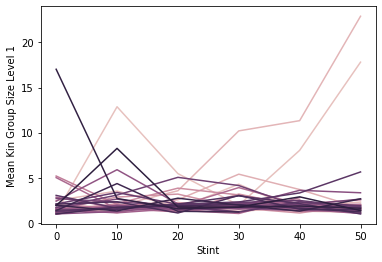

In [17]:
tp.tee(
    sns.lineplot,
    data=df,
    x='Stint',
    y='Mean Kin Group Size Level 1',
    hue='Series',
    legend=False,
    teeplot_outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',    
        '_dfdigest' : dfdigest,
    },
)

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 17.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 23.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 20.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


teeplots/bucket=prq49+endeavor=16+transform=identity+viz=swarmplot-boxplot+x=stint+y=mean-kin-group-size-level-1+_dfdigest=581a93929506b064+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=identity+viz=swarmplot-boxplot+x=stint+y=mean-kin-group-size-level-1+_dfdigest=581a93929506b064+ext=.png


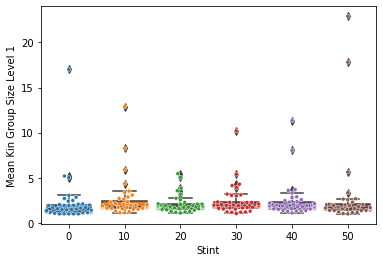

In [18]:
def swarmplot_boxplot(*args, **kwargs):
    sns.swarmplot(
        *args,
        **kwargs,
        edgecolor='w',
        linewidth=0.5,
        s=4,
    )
    sns.boxplot(
        *args,
        **kwargs,
    )

tp.tee(
    swarmplot_boxplot,
    data=df,
    x='Stint',
    y='Mean Kin Group Size Level 1',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',
        '_dfdigest' : dfdigest,
    },
)

# how does kin conflict change over time?

teeplots/bucket=prq49+endeavor=16+hue=series+transform=identity+viz=lineplot+x=stint+y=parent-eliminated-kin-id-commonality-2-a-kin-conflict-at-spawn-ratio+_dfdigest=581a93929506b064+ext=.pdf
teeplots/bucket=prq49+endeavor=16+hue=series+transform=identity+viz=lineplot+x=stint+y=parent-eliminated-kin-id-commonality-2-a-kin-conflict-at-spawn-ratio+_dfdigest=581a93929506b064+ext=.png


<AxesSubplot:xlabel='Stint', ylabel='Parent-Eliminated Kin ID Commonality=2+a=Kin Conflict at Spawn Ratio'>

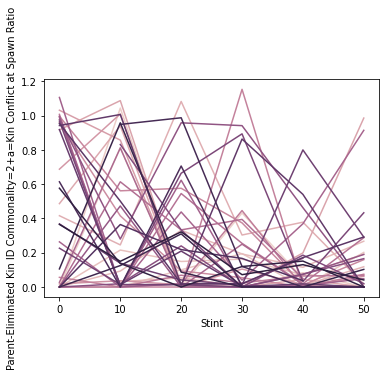

In [19]:
tp.tee(
    sns.lineplot,
    data=df,
    x='Stint',
    y='Parent-Eliminated Kin ID Commonality=2+a=Kin Conflict at Spawn Ratio',
    hue='Series',
    legend=False,
    teeplot_outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',    
        '_dfdigest' : dfdigest,
    },
)

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 7.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 17.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 22.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 20.5% of the points cannot be placed; yo

teeplots/bucket=prq49+endeavor=16+transform=identity+viz=swarmplot-boxplot+x=stint+y=parent-eliminated-kin-id-commonality-2-a-kin-conflict-at-spawn-ratio+_dfdigest=581a93929506b064+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=identity+viz=swarmplot-boxplot+x=stint+y=parent-eliminated-kin-id-commonality-2-a-kin-conflict-at-spawn-ratio+_dfdigest=581a93929506b064+ext=.png


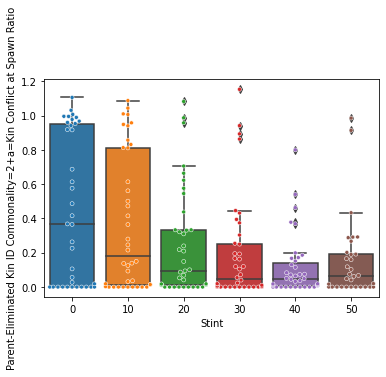

In [20]:
def swarmplot_boxplot(*args, **kwargs):
    sns.swarmplot(
        *args,
        **kwargs,
        edgecolor='w',
        linewidth=0.5,
        s=4,
    )
    sns.boxplot(
        *args,
        **kwargs,
    )

tp.tee(
    swarmplot_boxplot,
    data=df,
    x='Stint',
    y='Parent-Eliminated Kin ID Commonality=2+a=Kin Conflict at Spawn Ratio',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',
        '_dfdigest' : dfdigest,
    },
)